# Lab 5

In [ ]:
!pip install sklearn
!pip install plotly
!pip install chart-studio

In [1]:
import pandas as pd
from pandas import Series
from pandas import Grouper   #TimeGrouper deprecated
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.font_manager import FontProperties
matplotlib.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

### Dataset
The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Download the dataset from (https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv)
and place it in the current working directory with the filename `daily-minimum-temperatures.csv`

If using Azure, follow instructions here https://notebooks.azure.com/faq for loading data into noteboook

#### http://machinelearningmastery.com/time-series-data-visualization-with-python/

In [5]:
df = pd.read_csv('daily-minimum-temperatures.csv')
df.columns=['Date', 'Temperature']
df.set_index(df['Date'], inplace=True)
series = df['Temperature']

series = pd.to_numeric(series, errors='coerce')  #If ‘coerce’, then invalid parsing will be set as NaN
series.index = pd.DatetimeIndex(series.index)
idx = pd.date_range('1981-01-01', '1990-12-31')
series = series.reindex(idx, fill_value=0)
series

1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Freq: D, Name: Temperature, Length: 3652, dtype: float64

In [6]:
series.fillna(0, inplace=True)

### Line plots

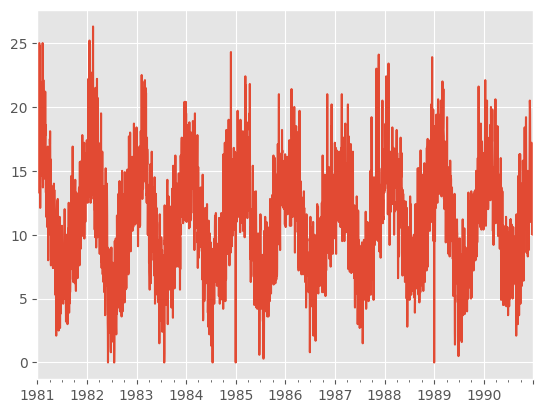

In [7]:
series.plot()
plt.show()

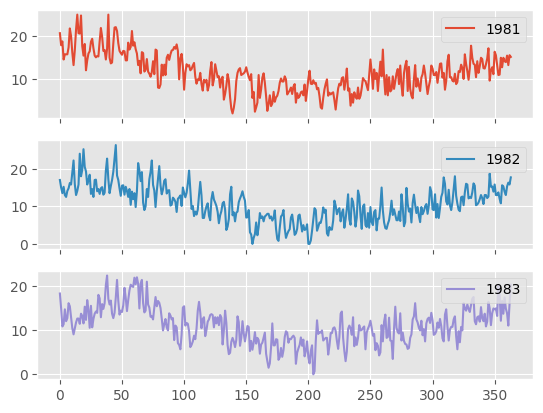

In [8]:
## Mutiple plots
## The Minimum Daily Temperatures dataset spans 10 years.
## We can group data by year and create a line plot for each year for direct comparison
groups = series.groupby(pd.Grouper(freq='A'))   #A: group by year, M: group by month, ..
years = pd.DataFrame()
for name, group in groups:
    #Choose onle first 365 days to line up leap years
    years[name.year] = group.values[0:364]
ax = years[[1981, 1982, 1983]].plot(subplots=True, legend=False)
for a in ax:
    patches, labels = a.get_legend_handles_labels()
    a.legend(patches, labels, loc='upper right')
plt.show()

#TODO:
# show the first 5 rows of the years dataframe
#- increase the figure size to (10,10)

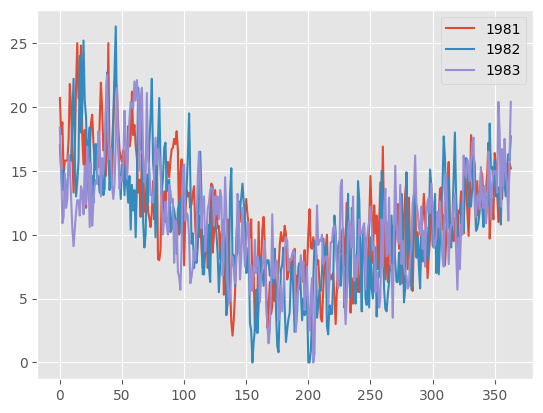

In [9]:
# Messy line graph in single plot
ax =years[[1981, 1982, 1983]].plot(kind='line', legend=False)
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='upper right')

## Heat maps

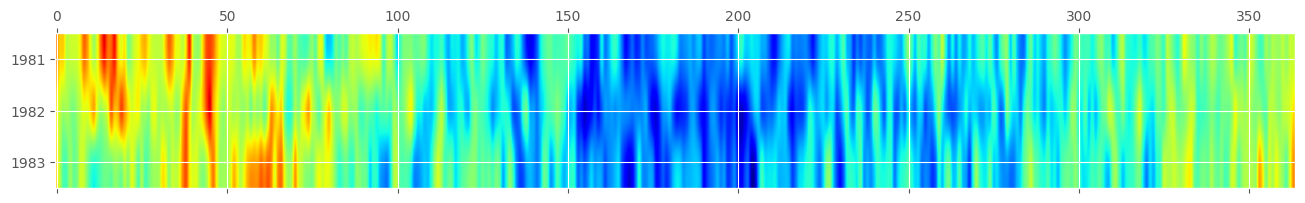

In [10]:
plt.matshow( years[[1981, 1982, 1983]].T, interpolation='gaussian', aspect='auto', cmap='jet');
plt.yticks(np.arange(len(years[[1981, 1982, 1983]].columns)), years[[1981, 1982, 1983]].columns);
#Try removing the interploation parameter from matshow

## Area Charts

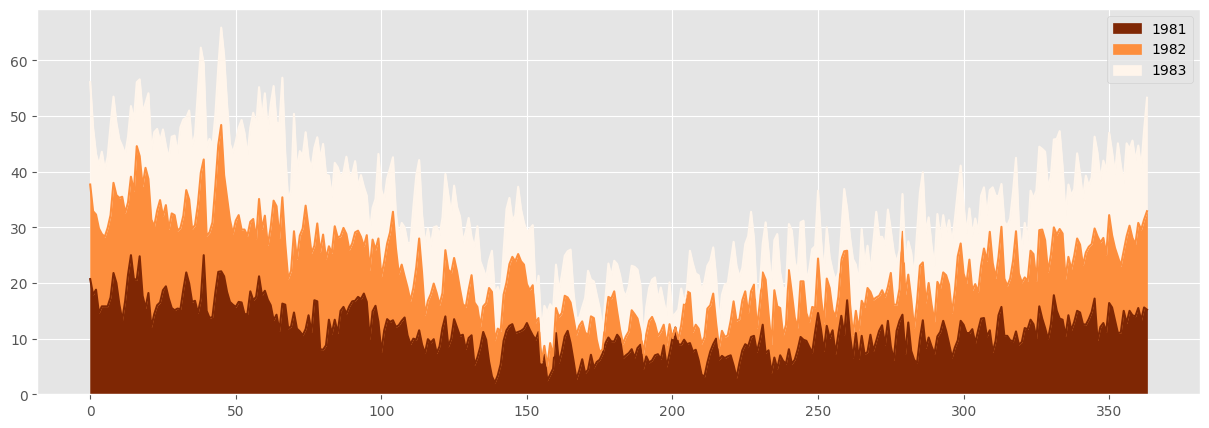

In [11]:
# Messy line graph in single plot

ax =years[[1981, 1982, 1983]].plot(kind='area', legend=False, figsize=(15,5), cmap='Oranges_r')
patches, labels = ax.get_legend_handles_labels();
ax.legend(patches, labels, loc='upper right');

#TODO: Try different color maps
#for more colormaps: https://matplotlib.org/examples/color/colormaps_reference.html
#add _r to the name to reverse colors

In [ ]:
#!pip uninstall plotly
#!pip uninstall chart-studio
#!pip install chart-studio

In [12]:
#Plotly is an online python graphing library with interactivity
#try hiding one of the line charts, try zooming in and out, and taking a snapshot 
#of your graphic in PNG format

#For API Key please sign-up and follow the instructions here;
#https://plotly.com/python/getting-started-with-chart-studio/
import plotly
import chart_studio.plotly as py
import plotly.graph_objects as go

# Offline mode
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

data = go.Scatter(x=years[[1981]].index, y=years[1981], name='1981')
data2 = go.Scatter(x=years[[1982]].index, y=years[1982], name='1982')

layout = go.Layout(height=600, width=800,
                   title='Temperature Plot', xaxis=dict(title='Days'),
                   yaxis=dict(title='(Temperature (°C))'))
data=[data, data2]

fig = go.Figure(data, layout=layout)
fig.write_html('first_figure.html', auto_open=True)

#Create your own username and api_key 
## Authenticate with your account

#chart_studio.tools.set_credentials_file(username='username', api_key='key')

py.iplot(data, sharing='public')

PlotlyRequestError: Authentication credentials were not provided.